<a href="https://colab.research.google.com/github/miraculusik/tensorflow-deep-learning-practices/blob/main/tensorflow_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question

**Q1 :** Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

**Q2 :** Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

**Q3 :** Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

**Q4 :**  Make a function to show an image of a random class of the fashion MNIST dataset and make a prediction on it.

## **Q1 :**
Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X.shape

(1000, 2)

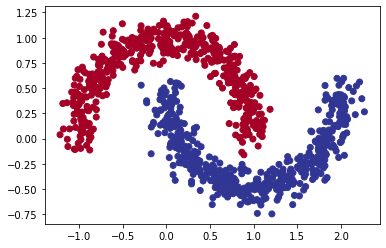

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)
X_train.shape, X_test.shape

((880, 2), (120, 2))

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation="elu"),
  tf.keras.layers.Dense(64, activation="elu"),
  tf.keras.layers.Dense(32, activation="elu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(X_train, y_train, 
          epochs=100, 
          validation_data=(X_test, y_test))

Epoch 1/100
28/28 [==============================] - 1s 9ms/step - loss: 0.4782 - accuracy: 0.7807 - val_loss: 0.3096 - val_accuracy: 0.8917
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2967 - accuracy: 0.8602 - val_loss: 0.2359 - val_accuracy: 0.9083
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2721 - accuracy: 0.8739 - val_loss: 0.2255 - val_accuracy: 0.9000
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2697 - accuracy: 0.8773 - val_loss: 0.2325 - val_accuracy: 0.8917
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2693 - accuracy: 0.8830 - val_loss: 0.2265 - val_accuracy: 0.8833
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.2685 - accuracy: 0.8693 - val_loss: 0.2246 - val_accuracy: 0.8833
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 0.2657 - accuracy: 0.8727 - val_loss: 0.2260 - val_accuracy: 0.9000
Epoch 8/100
2

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classifcation...


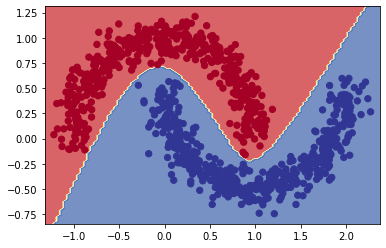

In [ ]:
plot_decision_boundary(model, X, y)

## **Q2** and **Q4**

**Q2 :** Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

**Q4 :**  Make a function to show an image of a random class of the fashion MNIST dataset and make a prediction on it.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist 

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
class_names = ["T-shirt/top",
                "Trouser",
                "Pullover",
                "Dress",
                "Coat",
                "Sandal",
                "Shirt",
                "Sneaker",
                "Bag",
                "Ankle boot"]

In [ ]:
import matplotlib.pyplot as plt
import random

def plot_random_image(X, y):
  plt.figure(figsize=(12, 9))
  for i in range(9):
    plt.subplot(3, 3, i+1)

    img_num = random.randint(0, len(X))
    img = X[img_num]
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(class_names[y[img_num]])
    plt.axis(False)
    plt.tight_layout()

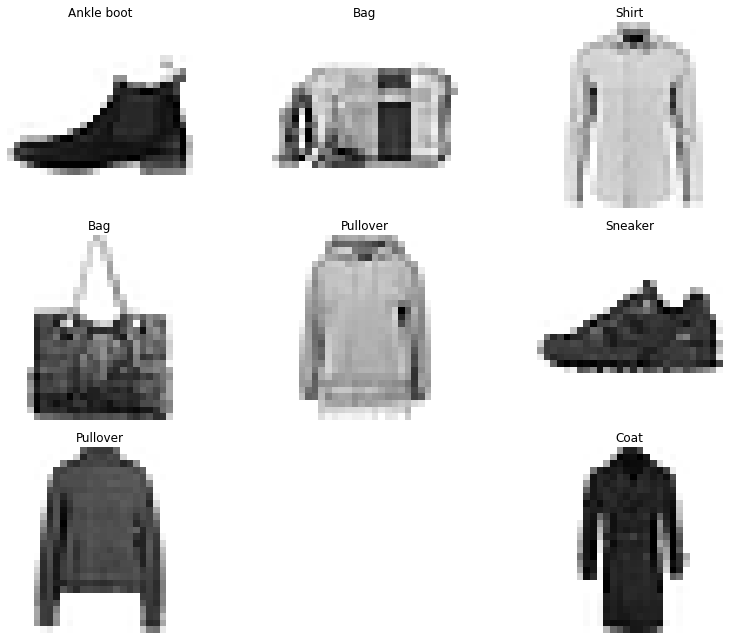

In [ ]:
plot_random_image(X_train, y_train)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(12, activation="elu"),
  tf.keras.layers.Dense(12, activation="elu"),
  tf.keras.layers.Dense(12, activation="elu"),
  tf.keras.layers.Dense(12, activation="elu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer= tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

fashion_history = model.fit(X_train, y_train,
                            epochs=10,
                            validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.6521 - accuracy: 0.7754 - val_loss: 0.5132 - val_accuracy: 0.8186
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4399 - accuracy: 0.8434 - val_loss: 0.4632 - val_accuracy: 0.8368
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4057 - accuracy: 0.8550 - val_loss: 0.4343 - val_accuracy: 0.8460
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3889 - accuracy: 0.8604 - val_loss: 0.4250 - val_accuracy: 0.8503
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3758 - accuracy: 0.8648 - val_loss: 0.4102 - val_accuracy: 0.8536
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3660 - accuracy: 0.8677 - val_loss: 0.4215 - val_accuracy: 0.8514
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3566 - accuracy: 0.8718 - val_loss: 0.4249 - val_accuracy:

In [ ]:
def plot_predic_random_image(X, y, preds):
  plt.figure(figsize=(12, 9))
  for i in range(9):
    plt.subplot(3, 3, i+1)

    img_num = random.randint(0, len(X))
    img = X[img_num]
    predicted_class = class_names[tf.argmax(preds[img_num])]
    plt.imshow(img, cmap=plt.cm.binary)
    
    if predicted_class == class_names[y[img_num]]:
      color = "green"
    else:
      color = "red"
    
    plt.title("True Class:"+class_names[y[img_num]] + "\nPredicted Class:"+ str(predicted_class), color=color)
    plt.axis(False)
    plt.tight_layout()

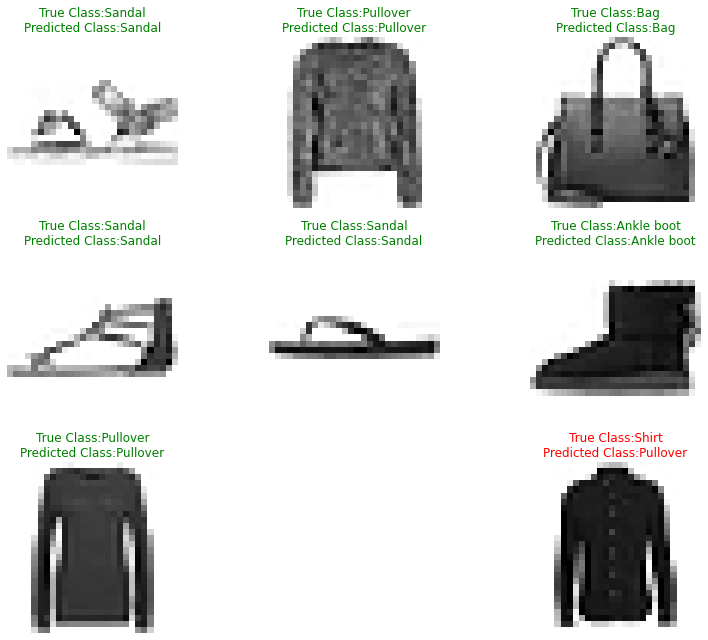

In [ ]:
preds = model.predict(X_test)
plot_predic_random_image(X_test, y_test, preds)

## **Q3 :**

Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [ ]:
X_test = tf.expand_dims(X_test, axis=-1)
X_train = tf.expand_dims(X_train, axis=-1)

In [ ]:
tf.random.set_seed(42)

improved_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation="tanh"),
  tf.keras.layers.Dense(32, activation="tanh"),
  tf.keras.layers.Dense(32, activation="tanh"),
  tf.keras.layers.Dense(32, activation="tanh"),
  tf.keras.layers.Dense(10, activation="softmax")
])

improved_model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                       optimizer= tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

In [ ]:
improved_model_history = improved_model.fit(X_train, y_train,
                                            epochs=20,
                                            batch_size=32,
                                            validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5282 - accuracy: 0.8152 - val_loss: 0.4491 - val_accuracy: 0.8359
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3864 - accuracy: 0.8594 - val_loss: 0.3950 - val_accuracy: 0.8599
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3544 - accuracy: 0.8710 - val_loss: 0.4135 - val_accuracy: 0.8502
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3353 - accuracy: 0.8774 - val_loss: 0.3658 - val_accuracy: 0.8650
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3200 - accuracy: 0.8834 - val_loss: 0.3861 - val_accuracy: 0.8653
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3107 - accuracy: 0.8860 - val_loss: 0.3771 - val_accuracy: 0.8672
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3018 - accuracy: 0.8893 - val_loss: 0.3817 - val_accuracy:

In [ ]:
import numpy as np

def plot_model_curves(history):
  #Loss
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  #Accuracy
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  #get epoch number 
  x_range = np.arange(1,len(loss)+1)
  
  #Plot figures 
  plt.figure(figsize=(12,5))
  # figure 1 - (loss & val_loss)
  plt.subplot(121)
  plt.plot(x_range, loss, label="loss")
  plt.plot(x_range, val_loss, label="val_loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.grid(color='gray', linestyle='-', linewidth=0.5)
  # figure 2 - (accuracy & val_accuracy)
  plt.subplot(122)
  plt.plot(x_range, accuracy, label="accuracy")
  plt.plot(x_range, val_accuracy, label="val_accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuraacy")
  plt.legend()
  plt.grid(color='gray', linestyle='-', linewidth=0.5)

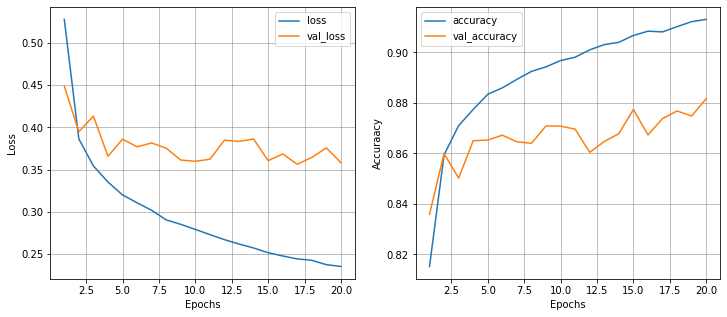

In [ ]:
plot_model_curves(improved_model_history)

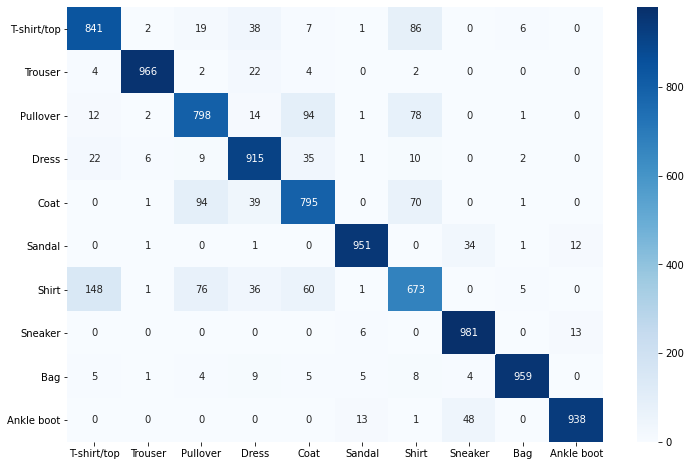

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

preds = tf.argmax(improved_model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g", 
            xticklabels=class_names,
            yticklabels=class_names)
plt.show()